In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'uuCF', 'k','dist_func', 'test_size', 'RMSE']

RMSEs = pd.read_csv('result/danhgia_ver1.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
rs = RMSEs.as_matrix()

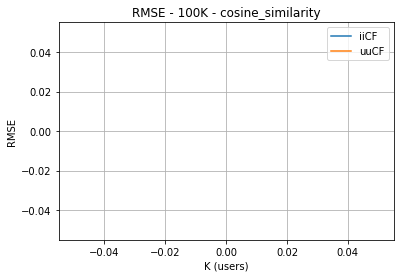

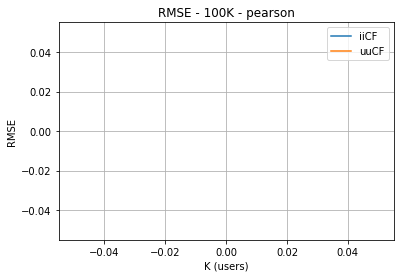

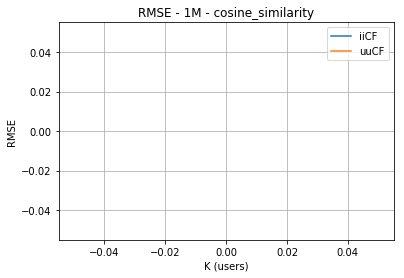

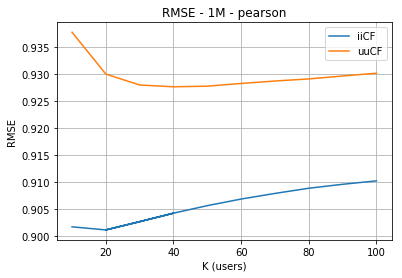

In [23]:
dataset = rs[:, 0]
uuCF = rs[:, 1]
func_dist = rs[:, 3]

for n in ['100K', '1M']:
    for func in ['cosine_similarity', 'pearson']:
        fig, ax = plt.subplots()
        ids_ii = np.where((func_dist == func) & (dataset == n) & (uuCF == 0))[0].astype(np.int32)
        ids_uu = np.where((func_dist == func) & (dataset == n) & (uuCF == 1))[0].astype(np.int32)
        items_ii = rs[ids_ii, 5]
        items_uu = rs[ids_uu, 5]
        t_ii = rs[ids_ii, 2]
        t_uu = rs[ids_uu, 2]
        ax.plot(t_ii, items_ii, label="iiCF")
        ax.plot(t_uu, items_uu, label="uuCF")
        ax.set(xlabel='K (users)', ylabel='RMSE',
               title= str('RMSE - ' + n + ' - ' + func))
        ax.legend()
        ax.grid()
        if n == '1M' and func == 'pearson': fig.savefig(n + func + 'RMSE.png')
        plt.show()

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'u', 'k', 'loops','top', 'p', 'r']

pr = pd.read_csv('result/danhgia.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(pr)
pr = pr.as_matrix()

   dataset  u  k  loops  top         p         r
0     100K  0  5    100   10  0.000212  0.000361
1     100K  0  5    100   20  0.005567  0.018977
2     100K  0  5    100   30  0.016260  0.083138
3     100K  0  5    100   40  0.017020  0.116031
4     100K  0  5    100   50  0.017731  0.151093
5     100K  0  5    100   60  0.018381  0.187963
6     100K  0  5    100   70  0.017937  0.213989
7     100K  0  5    100   80  0.017988  0.245256
8     100K  0  5    100   90  0.017179  0.263510
9     100K  0  5    100  100  0.016320  0.278149
10    100K  1  5    100   10  0.008590  0.014639
11    100K  1  5    100   20  0.008006  0.027291
12    100K  1  5    100   30  0.006858  0.035062
13    100K  1  5    100   40  0.005541  0.037773
14    100K  1  5    100   50  0.006469  0.055124
15    100K  1  5    100   60  0.006045  0.061811
16    100K  1  5    100   70  0.006408  0.076450
17    100K  1  5    100   80  0.005687  0.077535
18    100K  1  5    100   90  0.006080  0.093259
19    100K  1  5    

[0.00021208907741251324 0.005567338282078472 0.016260162601626018
 0.017020148462354192 0.017730646871686108 0.01838105337575115
 0.01793667626117255 0.017987804878048783 0.017179215270413575
 0.0163202545068929] [0.008589607635206787 0.008006362672322376 0.0068575468363379286
 0.005540827147401909 0.006468716861081654 0.006044538706256628
 0.0064081199818209365 0.005686638388123012 0.00607988688582538
 0.005991516436903499] [0.0003614675582866438 0.0189770468100488 0.08313753840592808
 0.11603108621001265 0.15109343936381708 0.1879631303090548
 0.2139887945056931 0.2452557382974878 0.2635098499909633
 0.2781492861015724] [0.014639436110609073 0.027290800650641604 0.03506235315380445
 0.03777335984095427 0.05512380263871317 0.06181095246701609
 0.07645038857762516 0.0775347912524851 0.0932586300379541
 0.10211458521597687]


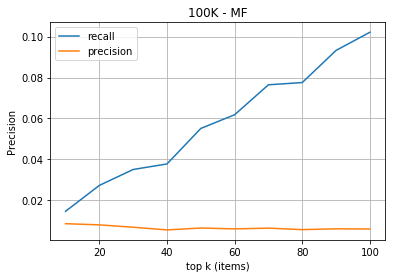

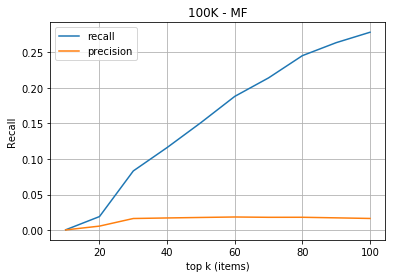

In [17]:
dataset = pr[:, 0]
u = pr[:, 1]

figP, axP = plt.subplots()
figR, axR = plt.subplots()
ids_ii = np.where((u == 0))[0].astype(np.int32)
ids_uu = np.where(u == 1)[0].astype(np.int32)
pi = pr[ids_ii, 5]
pu = pr[ids_uu, 5]
ri = pr[ids_ii, 6]
ru = pr[ids_uu, 6]
print(pi, pu, ri, ru)
t_ii = pr[ids_ii, 4]
t_uu = pr[ids_uu, 4]
axP.plot(t_ii, ru, label="recall")
axP.plot(t_ii, pu, label="precision")
axP.set(xlabel='top k (items)', ylabel='Precision',
       title= str('100K - MF'))
axP.legend()
axP.grid()
axR.plot(t_ii, ri, label="recall")
axR.plot(t_uu, pi, label="precision")
axR.set(xlabel='top k (items)', ylabel='Recall',
       title= str('100K - MF'))
axR.legend()
axR.grid()
figP.savefig('PR_u_MF_100K.png')
figR.savefig('PR_i_MF_100K.png')
plt.show()

[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18 19]
[0.028313891834570518 0.02391304347826087 0.01990102509720749
 0.017258748674443266 0.01737009544008484 0.017179215270413575
 0.016527798818360855 0.01588016967126193 0.015623895369388475
 0.01574761399787911]
[0.028313891834570518 0.02391304347826087 0.01990102509720749
 0.017258748674443266 0.01737009544008484 0.017179215270413575
 0.016527798818360855 0.01588016967126193 0.015623895369388475
 0.01574761399787911]


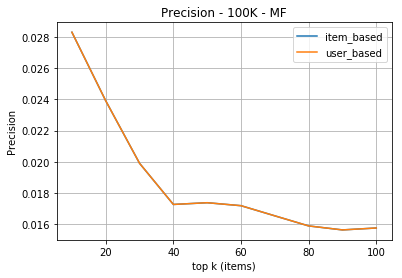

In [11]:
dataset = pr[:, 0]
u = pr[:, 1]

for n in ['100K']:
        figP, axP = plt.subplots()
#         figR, axR = plt.subplots()
        ids_ii = np.where((u == 0))[0].astype(np.int32)
        ids_uu = np.where((u == 1))[0].astype(np.int32)
        print(ids_ii, ids_uu)
        pi = pr[ids_ii, 5]
        pu = pr[ids_uu, 5]
        print(pi)
        print(pu)
        ri = pr[ids_ii, 6]
        ru = pr[ids_uu, 6]
        t_ii = pr[ids_ii, 4]
        t_uu = pr[ids_uu, 4]
        axP.plot(t_ii, pi, label="item_based")
        axP.plot(t_uu, pu, label="user_based")
        axP.set(xlabel='top k (items)', ylabel='Precision',
               title= str('Precision - 100K - MF'))
        axP.legend()
        axP.grid()
#         axR.plot(t_ii, ri, label="item_based")
#         axR.plot(t_uu, ru, label="user_based")
#         axR.set(xlabel='top k (items)', ylabel='Recall',
#                title= str('Recall - 100K - MF'))
#         axR.legend()
#         axR.grid()
#         figP.savefig(n + func + '.png')
#         figP.savefig(n + func + '.png')
        plt.show()

In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['lamda', 'loops','dataset', 'u', 'k', 'max','test', 'RMSE']

rmse = pd.read_csv('danhgia_ver1.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(rmse)
rmse = rmse.as_matrix()

    lamda  loops dataset  u  k  max  test      RMSE
0    0.10     10    100K  1  2  100     0  1.402052
1    0.10     20    100K  1  2  100     0  1.326572
2    0.10     30    100K  1  2  100     0  1.261004
3    0.10     40    100K  1  2  100     0  1.207165
4    0.10     50    100K  1  2  100     0  1.165163
5    0.10     60    100K  1  2  100     0  1.133977
6    0.10     70    100K  1  2  100     0  1.111020
7    0.10     80    100K  1  2  100     0  1.094781
8    0.10     90    100K  1  2  100     0  1.083648
9    0.10    100    100K  1  2  100     0  1.076054
10   0.20     10    100K  1  2  100     0  1.317788
11   0.20     20    100K  1  2  100     0  1.202964
12   0.20     30    100K  1  2  100     0  1.132007
13   0.20     40    100K  1  2  100     0  1.094541
14   0.20     50    100K  1  2  100     0  1.076299
15   0.20     60    100K  1  2  100     0  1.067769
16   0.20     70    100K  1  2  100     0  1.063848
17   0.20     80    100K  1  2  100     0  1.062041
18   0.20   

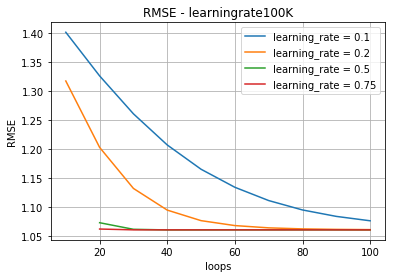

In [91]:
dataset = rmse[:, 2]
u = rmse[:, 3]
lamda = rmse[:, 0]

fig, ax = plt.subplots()
for i in [0.1, 0.2, 0.5, 0.75]:
    ids = np.where((lamda == i) & (u == 1) & (dataset == '100K'))[0].astype(np.int32)
    rmse_u = rmse[ids, 7]
    t = rmse[ids, 1]
    ax.plot(t, rmse_u, label=str('learning_rate = ' + str(i)))
ax.set(xlabel='loops', ylabel='RMSE',
    title= str('RMSE - learningrate' + n ))
ax.legend()
ax.grid()
fig.savefig('100K_MF_learningrate.png')
plt.show()

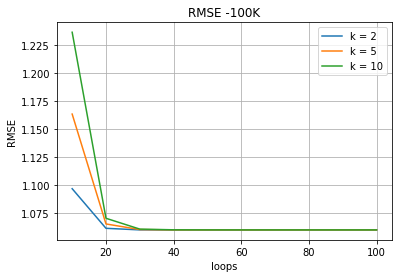

In [71]:
dataset = rmse[:, 1]
u = rmse[:, 2]
loops = rmse[:, 0] 
k = rmse[:, 3]

fig, ax = plt.subplots()
for i in [2, 5, 10]:
    ids = np.where((dataset == '100K') & (u == 1) & (k == i))[0].astype(np.int32)
    rmse_u = rmse[ids, 7]
    t = rmse[ids, 0]
    ax.plot(t, rmse_u, label= str('k = ' + str(i)))
ax.set(xlabel='loops', ylabel='RMSE',
        title= str('RMSE -' + n))
ax.legend()
ax.grid()
fig.savefig('100K_MF_k.png')
plt.show()

In [3]:
# # evenly sampled time at 200ms intervals
# t = np.arange(0., 5., 0.2)

# # red dashes, blue squares and green triangles
# plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
# plt.show()

Danh cho PR NBCF

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'u', 'loops', 'p', 'r']

pr = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(pr)
pr = pr.as_matrix()

   dataset  u  loops         p         r
0     100K  1     10  0.000424  0.000424
1     100K  1     20  0.000689  0.001379
2     100K  1     30  0.002757  0.008271
3     100K  1     40  0.004825  0.019300
4     100K  1     50  0.006681  0.033404
5     100K  1     60  0.007688  0.046129
6     100K  1     70  0.008938  0.062566
7     100K  1     80  0.009743  0.077943
8     100K  1     90  0.010168  0.091516
9     100K  1    100  0.010339  0.103393
10    100K  0     10  0.003270  0.003270
11    100K  0     20  0.004221  0.008442
12    100K  0     30  0.004558  0.013674
13    100K  0     40  0.004622  0.018490
14    100K  0     50  0.004542  0.022711
15    100K  0     60  0.004548  0.027289
16    100K  0     70  0.004476  0.031332
17    100K  0     80  0.004444  0.035553
18    100K  0     90  0.004393  0.039536
19    100K  0    100  0.004447  0.044471


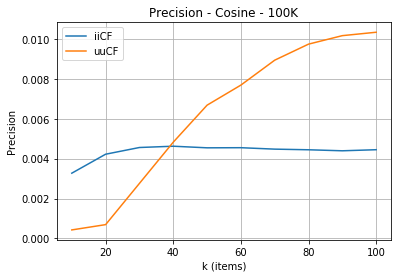

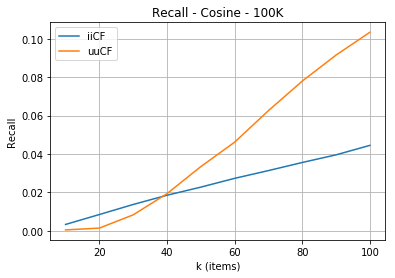

In [59]:
dataset = pr[:, 0]
u = pr[:, 1]

for n in ['100K']:
    figP, axP = plt.subplots()
    figR, axR = plt.subplots()
    ids_ii = np.where((dataset == n) & (u == 0))[0].astype(np.int32)
    ids_uu = np.where((dataset == n) & (u == 1))[0].astype(np.int32)
    pi = pr[ids_ii, 3]
    pu = pr[ids_uu, 3]
    ri = pr[ids_ii, 4]
    ru = pr[ids_uu, 4]
    t_ii = pr[ids_ii, 2]
    t_uu = pr[ids_uu, 2]
    axP.plot(t_ii, pi, label="iiCF")
    axP.plot(t_uu, pu, label="uuCF")
    axP.set(xlabel='k (items)', ylabel='Precision',
           title= str('Precision - Cosine - ' + n))
    axP.legend()
    axP.grid()
    axR.plot(t_ii, ri, label="iiCF")
    axR.plot(t_uu, ru, label="uuCF")
    axR.set(xlabel='k (items)', ylabel='Recall',
           title= str('Recall - Cosine - ' + n))
    axR.legend()
    axR.grid()
    figP.savefig(n + 'cosine_precision.png')
    figR.savefig(n + 'cosine_recall.png')
    plt.show()

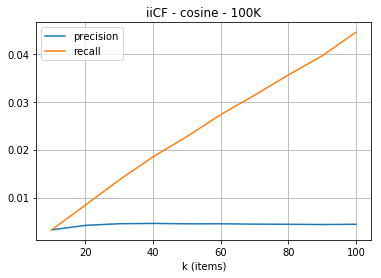

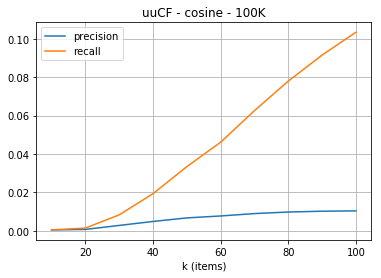

In [62]:
dataset = pr[:, 0]
u = pr[:, 1]

for n in ['100K']:
    figP, axP = plt.subplots()
    figR, axR = plt.subplots()
    ids_ii = np.where((dataset == n) & (u == 0))[0].astype(np.int32)
    ids_uu = np.where((dataset == n) & (u == 1))[0].astype(np.int32)
    pi = pr[ids_ii, 3]
    pu = pr[ids_uu, 3]
    ri = pr[ids_ii, 4]
    ru = pr[ids_uu, 4]
    t_ii = pr[ids_ii, 2]
    t_uu = pr[ids_uu, 2]
    axP.plot(t_ii, pi, label="precision")
    axP.plot(t_ii, ri, label="recall")
    axP.set(xlabel='k (items)',
           title= str('iiCF - cosine - ' + n))
    axP.legend()
    axP.grid()
    axR.plot(t_uu, pu, label="precision")
    axR.plot(t_uu, ru, label="recall")
    axR.set(xlabel='k (items)',
           title= str('uuCF - cosine - ' + n))
    axR.legend()
    axR.grid()
    figP.savefig(n + 'c_pr_iiCF.png')
    figR.savefig(n + 'c_pr_uuCF.png')
    plt.show()

In [81]:
for i in np.arange(0.1, 1, 0.05): 
    print(i)

0.1
0.15000000000000002
0.20000000000000004
0.25000000000000006
0.30000000000000004
0.3500000000000001
0.40000000000000013
0.45000000000000007
0.5000000000000001
0.5500000000000002
0.6000000000000002
0.6500000000000001
0.7000000000000002
0.7500000000000002
0.8000000000000002
0.8500000000000002
0.9000000000000002
0.9500000000000003


In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['lamda','RMSE']

rmse = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(rmse)
rmse = rmse.as_matrix()

   lamda      RMSE
0      1  1.061961
1      2  1.062749
2      3  1.063231
3      4  1.065408
4      5  1.065812
5      6  1.066981
6      7  1.066476
7      8  1.069385
8      9  1.067220
9     10  1.070962


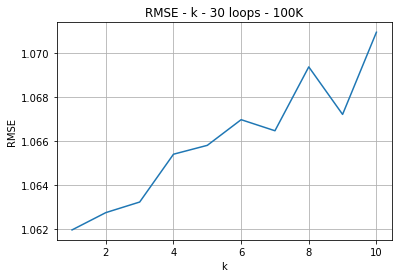

In [16]:
fig, ax = plt.subplots()
_rmse = rmse[:, 1]
t = rmse[:, 0]
ax.plot(t, _rmse)
ax.set(xlabel='k', ylabel='RMSE',
    title= str('RMSE - k - 30 loops - 100K' ))
ax.legend()
ax.grid()
fig.savefig('100K_MF_k_loops_30_100.png')
plt.show()